In [6]:
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import numpy as np

heights = np.asarray([1.32, 1.45, 1.66, 1.88]).reshape(-1, 1)
weights = np.asarray([55, 67, 70, 100]).reshape(-1, 1)
centers = np.asarray([1.0, 1.2, 1.4, 1.6, 1.8, 2.0]).reshape(-1, 1)
print("centers.shape", centers.shape)
print("heights.shape", heights.shape)
print("weights.shape", weights.shape)

# I recommend playing around with these parameters and seeing how well you fit
# the data.  Changing one of the parameters will change the optimal value of
# the other:
sigma = 0.1
alpha = 0.0001

# New representation:
x = rbf_kernel(heights, centers, gamma=1 / sigma)
print("x.shape", x.shape)
print("Original inputs", heights)
print("RBF repr", x)

# Now go and fit a linear model between x and height
regr = Ridge(alpha=alpha, fit_intercept=False)
regr.fit(x, weights)
print("Score on training data = ", regr.score(x, weights))
all_x = np.linspace(-3.0, 5.0, 1000).reshape(-1, 1)

# New representation:
expanded_x = rbf_kernel(all_x, centers, gamma=1 / sigma)
all_y = regr.predict(expanded_x)
print("all_x.shape", all_x.shape)
print("expanded_x.shape", expanded_x.shape)
print("all_y.shape", all_y.shape)


centers.shape (6, 1)
heights.shape (4, 1)
weights.shape (4, 1)
x.shape (4, 6)
Original inputs [[1.32]
 [1.45]
 [1.66]
 [1.88]]
RBF repr [[3.59155441e-01 8.65887748e-01 9.38005000e-01 4.56576050e-01
  9.98586094e-02 9.81346359e-03]
 [1.31993843e-01 5.35261429e-01 9.75309912e-01 7.98516219e-01
  2.93757700e-01 4.85578213e-02]
 [1.28296036e-02 1.20512717e-01 5.08647519e-01 9.64640293e-01
  8.22012235e-01 3.14742637e-01]
 [4.33334765e-04 9.81346359e-03 9.98586094e-02 4.56576050e-01
  9.38005000e-01 8.65887748e-01]]
Score on training data =  0.9999957340594902
all_x.shape (1000, 1)
expanded_x.shape (1000, 6)
all_y.shape (1000, 1)


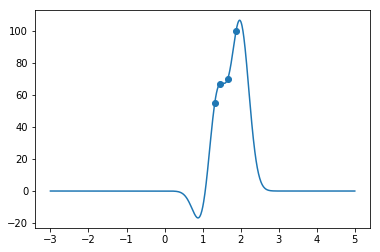

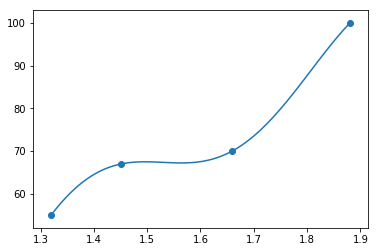

In [7]:
# Show that the predictions tend to zero far away from inputs
plt.figure()
plt.plot(all_x, all_y)
plt.scatter(heights, weights)

# Zoom in and see how well predictions fit the data
zoom_ind = (all_x > heights.min()) & (all_x < heights.max())
plt.figure()
plt.plot(all_x[zoom_ind], all_y[zoom_ind])
plt.scatter(heights, weights)
plt.show()

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import pandas as pd

In [11]:
years = range(2011, 2017)
files = ['CRNS0101-05-%d-CA_Yosemite_Village_12_W.txt' % y for y in years]
usecols = [1, 2, 8]

data = [np.loadtxt(f, usecols=usecols) for f in files]
data = np.vstack(data)

data = [np.loadtxt(f, usecols=usecols) for f in files]
data = np.vstack(data)
# Map from HHmm to an integer
data[:, 1] = np.floor_divide(data[:, 1], 100) * 60 + np.mod(data[:, 1], 100)
valid = (data[:, 2] > -1000) & (data[:, 0] == 20160125)
print(data.shape)

(631296, 3)


In [14]:
data[:, 0]

array([20110101., 20110101., 20110101., ..., 20161231., 20161231.,
       20170101.])

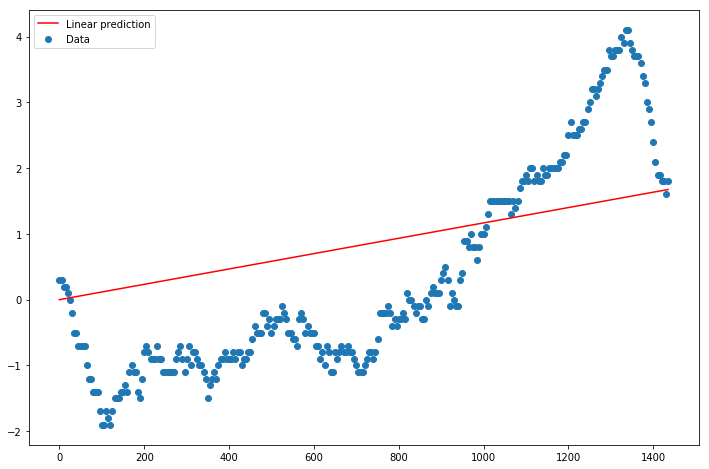

In [37]:
x_train = data[valid, 1].reshape(-1, 1)
y_train = data[valid, 2]
regr = linear_model.Ridge(alpha=0.001, fit_intercept=False)
#regr = linear_model.Lasso(alpha=0.0001, fit_intercept=False)
regr.fit(x_train, y_train)

x_predict = [[0], [1435]]
y_predict = regr.predict(x_predict)

plt.figure(figsize=(12,8))
plt.scatter(data[valid, 1], data[valid, 2], label='Data')

plt.plot(x_predict, y_predict, label='Linear prediction', color='r')
plt.legend(loc='best')
plt.show()

In [42]:
n_rbf = 300
rbf_centers = np.linspace(0,1435,n_rbf).reshape(-1,1)
from sklearn.metrics.pairwise import rbf_kernel
sigma = 1
rbf_X_train = rbf_kernel(x_train, rbf_centers, gamma=1 / sigma)
regr_rbf = linear_model.Ridge(alpha=0.001, fit_intercept=False)
regr_rbf.fit(rbf_X_train, y_train)
y= regr_rbf.predict (rbf_X_train)
mean_squared_error(y_train, y)

0.4531885913447186

In [45]:
len(y_train)

288

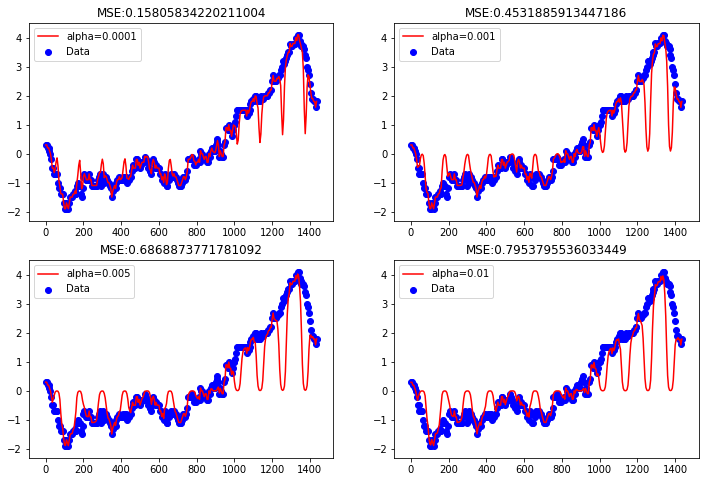

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_true = y_train
x_true = x_train
plt.figure(figsize=(12,8))
rbf_X = rbf_kernel(x_true, rbf_centers, gamma = 1/sigma)
count=1
for _ in [0.0001,0.001,0.005, 0.01]:
    regr_rbf = linear_model.Ridge(alpha=_, fit_intercept=False)
    regr_rbf.fit(rbf_X, y_train)
    plot_y_2 = regr_rbf.predict(rbf_X)
    plt.subplot(2,2,count)
    plt.plot(x_true, plot_y_2,color='red', label='alpha={}'.format(_))
    plt.scatter(x_true, y_true, label='Data', color='blue')
    plt.title('MSE:{}'.format(mean_squared_error(y_true, plot_y_2)))
    plt.legend()
    count+=1
    
plt.show()